# 6.4a) going through the ML steps again with data 2010-2022 grouped by country - number of sources & produce value

In [1]:
# a) import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# set path
path = r'C:\Users\rieke\Data Analytics\Achievement 6\02 Data'

In [10]:
df = pd.read_excel(os.path.join(path, '02 Prepared Data', 'grouped data 2010-2022.xlsx'), index_col = False)

In [11]:
df.head()

,Unnamed: 0,COUNTRY,count_of_sources,mean_value
0,0,Argentina,1757,4154.240981
1,1,Australia,3042,7173.119007
2,2,Austria,3781,1655.600531
3,3,Belgium,3795,1976.940823
4,4,Brazil,1800,16169.329967


In [12]:
df = df.drop(columns = ['Unnamed: 0'])

In [13]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df['count_of_sources'].values.reshape(-1,1)
y = df['mean_value'].values.reshape(-1,1)

In [14]:
X

array([[1757],
       [3042],
       [3781],
       [3795],
       [1800],
       [2283],
       [3997],
       [2915],
       [2155],
       [ 463],
       [2022],
       [1392],
       [3900],
       [3321],
       [3272],
       [3584],
       [4181],
       [4030],
       [3442],
       [3606],
       [4106],
       [2304],
       [1785],
       [3459],
       [3744],
       [3565],
       [3543],
       [2792],
       [3383],
       [3168],
       [1389],
       [3706],
       [3626],
       [3109],
       [1801],
       [3583],
       [4066],
       [3708],
       [4079],
       [4103],
       [3586],
       [3699],
       [3602],
       [2049],
       [2026],
       [3730],
       [3636],
       [3861],
       [3726],
       [3504],
       [3761],
       [3905]], dtype=int64)

In [15]:
y

array([[4.15424098e+03],
       [7.17311901e+03],
       [1.65560053e+03],
       [1.97694082e+03],
       [1.61693300e+04],
       [9.53597112e+02],
       [1.28232925e+04],
       [2.22854094e+03],
       [2.05657352e+03],
       [3.32667660e+02],
       [4.24329304e+02],
       [2.05553020e+02],
       [1.82363956e+03],
       [9.53832905e+02],
       [2.99961576e+02],
       [1.83863194e+03],
       [1.03683470e+04],
       [1.29913890e+04],
       [1.37327910e+03],
       [9.08018356e+02],
       [2.21569210e+05],
       [6.50996761e+02],
       [4.32323821e+04],
       [7.53489612e+02],
       [7.09966983e+03],
       [2.62758486e+04],
       [1.32180805e+04],
       [2.25859099e+02],
       [2.23389425e+02],
       [1.53901261e+02],
       [7.88515500e+01],
       [7.55025011e+03],
       [2.94937974e+03],
       [1.14571395e+03],
       [1.73901432e+02],
       [3.18613797e+03],
       [1.11356211e+05],
       [4.47377854e+04],
       [7.49673631e+04],
       [2.25301922e+05],


In [16]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [17]:
# Create a regression object.

regression = LinearRegression()

In [18]:
regression.fit(X_train, y_train)

LinearRegression()

In [19]:
y_predicted = regression.predict(X_test)

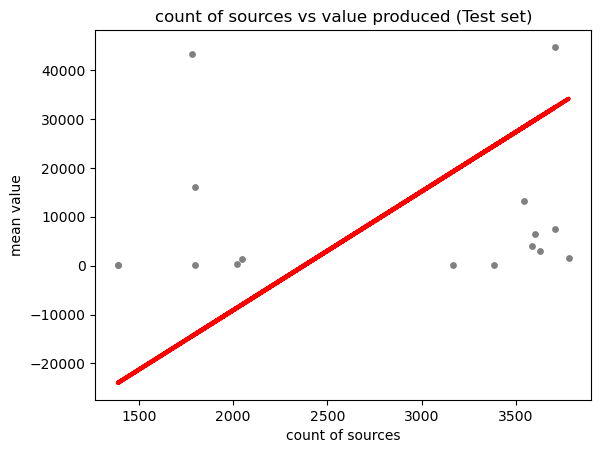

In [20]:
plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('count of sources vs value produced (Test set)')
plot_test.xlabel('count of sources')
plot_test.ylabel('mean value')
plot_test.show()

In [21]:
# Create objects that contain the model summary statistics.
rmse = mean_squared_error(y_test, y_predicted) 
r2 = r2_score(y_test, y_predicted) 

In [22]:
# Print the model summary statistics.
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[24.30187356]]
Mean squared error:  669288764.7430732
R2 score:  -2.384126502434447


In [23]:
# Create a dataframe comparing the actual and predicted values of y.
data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,223.389425,24483.101322
1,44737.785352,32381.210229
2,205.553020,-23901.928939
3,173.901432,-13962.462653
4,1655.600531,34155.246999
5,78.851550,-23974.834560
6,3946.811913,29416.381655
7,2949.379735,30388.456597
8,13218.080489,28371.401092
9,16169.329967,-13986.764526
